0114

# CNN ( Convolutional Neural Network ) : 합성곱 신경망

### FC Layer (Fully Connected Layer)
- 이전 layer의 모든 node가 다음 layer의 모든 node에 연결되어서 학습되는 구조
- FC Layer를 다른말로 Dense Layer라고도 한다!


- 지금까지 우리가 작업한 신경망은 모두 FC layer를 이용하고 있다


- FC Layer의 특징은 MNIST의 예제처럼 입력데이터가 1차원으로 한정되요!
    - 하나의 데이터가 1차원으로   
    - 원래 3차원인데 MNIST는 흑백이므로 2차원  
    - 2차원이라 FC Layer 이용못했어 그래서 28*28 곱해서 사용  
      ===> 즉, 각각의 이미지가 1차원으로 표현이 되어야 한다  
  그래서 2차원 이미지를 우리가 1차원으로 변환시켜서 사용한 것  
- 우리가 사용한 MNIST예제는 상당히 간단한 이미지 학습, 예측 예제


- 이미지 학습의 가장 큰 문제는 이미지가 살짝 휘어있거나 크기가 제각각이거나 변형이 조금만 생겨도 학습이 힘들어 진다
- 이런 경우에는 training data가 굉장히 많이 필요하고 추가적으로 학습할 때 많은 시간을 요구하게 된다

- 고민고민고민 하면서 방법을 연구하기 시작


- 사람이 학습하는 방식을 모델링
    - 하나하나 기억하지 않고, 각사람에 대해서 눈이 크네? 턱이 각져있네 등등 특징을 뽑아서 기억해
    - 사람은 변형이 생겨도 그 특징들을 기억해서 판단할 수 있음
        - => 데이터가 가지고 있는 특징들을 뽑아내서 일부분을 추출
        - => 각각의 특징들을 추출한다고 보면 됨
        - => 특징을 뽑아내서 여러개의 이미지를 학습
- 하나의 이미지의 특징을 뽑아내서 한이미지를 여러번 학습시킴
- 특징을 뽑아서 사이즈를 줄인다음 여러번 학습


- 찾아낸 방법은 이미지의 픽셀값을 그대로 입력하는게 아니라 이 이미지를 대표하는 특징을 도출해서 신경망에 여러개 넣어서 학습하는 방식!


- 1장의 컬러사진은 width, height, color(depth) 3차원으로 표현
- 여러장의 사진이 사용되기 때문에 입력데이터는 4차원으로 표현


- 실제 이미지 1장은 3차원이고 이놈을 flatten시켜서 1차원으로 표현해야한다! 크기를 조절해야 되기 때문에 공간에 대한 데이터를 유실할 우려가 있어!
- 이런  데이터 유실 때문에 학습과 예측에 문제가 발생하게 된다!
- FC Layer에 넣기 전에 
- 입력데이터 -> CNN -> 1장의 이미지를 여러개의 이미지로 분할(원본이미지의 특색을 가지고 있는 작은 이미지)[Convolution] -> FC Layer

- 공간데이터의 유실을 없애고 이미지의 특성을 추출해서 학습이 용이하게 만드는 방식 => **CNN**

## Code로 알아보자
사용되어지는 함수부터 알아보자  
Sample CNN


In [30]:
import tensorflow as tf
import numpy as np

# 입력 데이터의 형식 : 3*3*1 이미지 1개를 이용
# 입력 데이터 => (이미지개수. width, height, color) => (1,3,3,1)
# 총 9개의 데이터가 사용(1~9)
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)  #  ([]) 1차원 ([[],[]]) 2차원
print("image의 shape : {}".format(image.shape))  # (1,3,3,1)

# Actrivation map을 위한 filter를 정의 (Width, height, color,filter개수)
# filter (2,2,1,3)
weight = np.array([[[[1,10,-1]],[[1,10,-1]]],[[[1,10,-1]],[[1,10,-1]]]])
print("weight의 shape : {}".format(weight.shape))
      
# stride = 1(가로,세로를 1씩 움직여요)
# 이미지의 개수 생각않고 2차원으로 뽑겠다
conv2d = tf.nn.conv2d(image,weight,
                      strides=[1,1,1,1], padding="VALID")
# conv2d <- tf의 node
# [1,1] <- 가운데가 실제 가로 세로 stride 앞과 뒤는 dummy 임의로 붙여줌
# VALID : padding하지말아라 -> 사이즈 줄게됨
print("conv2d의 shape : {}".format(conv2d.shape))
sess = tf.Session()
conv2d = sess.run(conv2d)

# pooling layer
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], 
                      strides=[1,1,1,1],padding="SAME")
# 앞뒤 1 4차원 데이터를 mapping시키기 위한 dummy변수
# SAME의 의미는 padding을 상하좌우에 붙인다는게 아니라 출력크기가 처음과 같게 해주도록 붙여준다는 것
# stride 크기는 가로 ㅔ로 같게 잡는것이 좋음
# 양옆의 1,1은 4차원 만들어주는 더미변수일뿐

print("pool의 shape:{}".format(pool.shape))

image의 shape : (1, 3, 3, 1)
weight의 shape : (2, 2, 1, 3)
conv2d의 shape : (1, 2, 2, 3)
pool의 shape:(1, 2, 2, 3)



### convolution 결과 이미지가 원본이미지에 비해 어떻게 다른지 눈으로 확인해보자

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
conv2d의 shape:(1, 14, 14, 5)
conv2d_img의 shape:(1, 14, 14, 5)


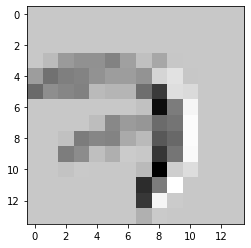

In [32]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

# Data Loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap="Greys")

# 해당 이미지를 Convolution 처리를 해보아요
# 입력데이터 => (이미지개수. width, height, color) => (1,3,3,1)
img = img.reshape(-1,28,28,1)  # 맨앞 이미지 수이므로 1이라고 써도 도지만 
# -1쓰면 뒤에거 채우고 나머지 다 이미지 개수로 채움
# reshape : 차원 바꿔줌

# Activation map을 위한 filter를 정의
# (width, height, color, filter개수)
W = tf.Variable(tf.random_normal([3,3,1,5]), name="filter1") # 랜덤으로 도출
conv2d = tf.nn.conv2d(img,W,strides = [1,2,2,1],
                     padding="SAME")
# 원래 데이터와 filter데이터 convolution
    # strides가 1일 경우" paddig="SAME" 하면 원래 크기와 같게 나오지만 28,28
    # strides가 2일 경우" padding="SAME" 하면 원래 크기의 절반크기로 출력됨 14,14

print("conv2d의 shape:{}".format(conv2d.shape))   # (1, 14, 14, 5)
sess.run(tf.global_variables_initializer()) # tf.Variable 실행시켜주려고
conv2d = sess.run(conv2d)

# 이미지를 표현하게 위해서 축을 전환
# (1,14,14,5) => (5,14,14,1) # filter당 하나씩 5개 있음
conv2d_img = np.swapaxes(conv2d,0,3) # 축을바꿔줌 0번째 축과 3번째 축을 바꿔줌
print("conv2d_img의 shape:{}".format(conv2d.shape))
plt.imshow(conv2d_img[1].reshape(14,14), cmap="Greys")

# tensorflow-MNIST with CNN

In [37]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

# Graph 초기화
tf.reset_default_graph()

# Placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)
dout_rate = tf.placeholder(dtype=tf.float32)

# Convolution Layer
x_img = tf.reshape(X,[-1,28,28,1])   # convolution 들어가려면 4차원 이어야해
W1 = tf.Variable(tf.random_normal([3,3,1,32]))
# filter 랜덤으로 잡는거야 머신러닝 아니야
L1 = tf.nn.conv2d(x_img,W1,strides=[1,1,1,1],padding="SAME")
L1 = tf.nn.relu(L1)  # 너무커지지않게 줄여줌
L1 = tf.nn.max_pool(L1,ksize=[1,2,2,1], strides=[1,2,2,1],
                   padding="SAME")   # size를 반으로 줄임

W2 = tf.Variable(tf.random_normal([3,3,32,64]))   # 3번째 거 32 <- channel 수
L2 = tf.nn.conv2d(L1,W2,strides=[1,1,1,1],padding="SAME")
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2,ksize=[1,2,2,1], strides=[1,2,2,1],
                   padding="SAME")

# 이렇게 만든 데이터를 FC Layer에 넣어서 학습해야 해
# 입력이 1차원으로 들어와야해
# L2 2차원으로 들어와야해

L2 = tf.reshape(L2,[-1,7*7*64])  # -1: 이미지의 개수 55000장, 64장의 학습한 이미지

W3 = tf.get_variable("weight3", shape = [7*7*64,256],
                    initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name="bias1")
# depth가 이깊으로면깊을수록 연상이 안돼
_layer1 = tf.nn.relu(tf.matmul(L2,W3)+b1)
layer1 = tf.nn.dropout(_layer1, keep_prob=dout_rate)   # 256개 output을 다 뽑아내지 않겠다. node를 아예삭제하는게 아니라 
# 기능을 상실키시는것
# rate=0이 다 살아있는거
# rate=0.3 => 30% 죽인 layer

W4 = tf.get_variable("weight4", shape=[256,256],
                    initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name="bias2")
_layer2 = tf.nn.relu(tf.matmul(layer1,W4)+b2)
layer2 = tf.nn.dropout(_layer2, keep_prob=dout_rate) 
    
W5 = tf.get_variable("weight5", shape=[256,10],
                    initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), name="bias3")
# 사실 sigmoid쓰나 softmax쓰나 같은결과, softmax는 전체 확률로 바뀌고 sigmoid에서 가장 큰 값이 softmax에서도
# 가장 큰값인건 바뀌지 않음


# Hypothesis
logit= tf.matmul(layer2,W5) + b3
H = tf.nn.relu(logit)
# sigmoid를 해서 softmax하면 가장 효율적임#

# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=Y)) # 이건 그대로

# train
train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)    # 이것도 자주쓰이지만 큰 효과는 x

# session chrlghk
sess=tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
num_of_epoch = 50   #반복횟수
batch_size = 100

for step in range(num_of_epoch):
    num_of_iter = int(mnist.train.num_examples/batch_size)
    cost_val=0
                      
    for i in range(num_of_iter):
        batch_x,batch_y = mnist.train.next_batch(batch_size)   # x,y 100개씩 떼오기
        _,cost_val = sess.run([train,cost], feed_dict = {X:batch_x, 
                                                         Y:batch_y,
                                                         dout_rate:0.7})   # 30%끄고 학습 overfitting 피하려고
    if step%5 ==0:
        print("cost:{}".format(cost_val))
  

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
cost:0.24849632382392883
cost:0.14011162519454956
cost:0.03827530890703201
cost:0.1509752720594406
cost:0.18645672500133514
cost:0.18483661115169525
cost:0.30755218863487244
cost:0.27797287702560425
cost:0.053989410400390625
cost:0.0871821790933609


In [39]:
# Accuracy 측정
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))

print("정확도 : {}".format(sess.run(accuracy, 
                               feed_dict={X:mnist.test.images,
                                          Y:mnist.test.labels,
                                          dout_rate:1})))
# 학습은 overfitting 피하려고 30% 죽이고 하는데 정확도는 0으로 해줘야해

정확도 : 0.984000027179718


# 혜준

In [ ]:
# tensorflow-MNIST with CNN

import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

# Data Loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

# Graph 초기화
tf.reset_default_graph()

# Placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)
keep_rate = tf.placeholder(dtype=tf.float32)

# Convolution Layer
x_img = tf.reshape(X,[-1,28,28,1]) # X를 이모양으로 바꿔
W1 = tf.Variable(tf.random_normal([3,3,1,32])) # 3,3,1에 filter 32개 
L1 = tf.nn.conv2d(x_img, W1, strides=[1,1,1,1], padding="SAME") 
L1 = tf.nn.relu(L1) # convolution을 하면 값이 커지거나 작아지기때문에 relu를 해줍니다.
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME") # pooling도 여기서는 해줄게요
# stride를 2로 잡고 padding을 해주었으니 size가 반으로 줄었겠죠 
# 결과적으로 [None,14,14,32]

W2 = tf.Variable(tf.random_normal([3,3,32,64])) # (새필터가로, 새필터세로, 이전에필터갯수, 새로운필터갯수)
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding="SAME") 
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
# stride를 2로 잡고 다시 padding을 해주었으니 size가 또 반으로 줄었겠죠
# 결과적으로 [None,7,7,64]


# 이렇게 만든 데이터를 FC Layer에 넣어서 학습해야 해요!
L2 = tf.reshape(L2,[-1,7*7*64])

W3 = tf.get_variable("weight3", shape=[7*7*64,256],
                    initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name= "bias1")
_layer1 = tf.nn.relu(tf.matmul(L2,W3) + b1) # 이렇게 하면 256개가 나옴
layer1 = tf.nn.dropout(_layer1, keep_prob=keep_rate) # 위의 256개의 노드의 기능을 상실시키겠다.30%를 죽여서 넘기겠다.
# cpu_env에서는 rate가 아니라 keep_prob으로 keep_rate는 남기고 싶은 퍼센트를 넣어주면 된다


W4 = tf.get_variable("weight4", shape=[256,256],
                     initializer=tf.contrib.layers.xavier_initializer()) # 초기화 방법       
b2 = tf.Variable(tf.random_normal([256]), name="bias2")
_layer2 = tf.nn.relu(tf.matmul(layer1,W4) + b2)
layer2 = tf.nn.dropout(_layer2, keep_prob=keep_rate)

W5 = tf.get_variable("weight5", shape=[256,10],
                     initializer=tf.contrib.layers.xavier_initializer()) # 초기화 방법      
b3 = tf.Variable(tf.random_normal([10]), name="bias3")


# Hypothesis
logit = tf.matmul(layer2, W5) + b3
H = tf.nn.relu(logit)


# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                              labels = Y))

# train
train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)
# Adamoptimizer가 더 좋은 성능을 가진 함수이다!!!

# session, 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
num_of_epoch = 30 
batch_size = 100

for step in range(num_of_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    cost_val = 0
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train,cost], feed_dict={X:batch_x,
                                                       Y:batch_y,
                                                       keep_rate:0.7})
        
    if step % 3 == 0:
        print("Cost : {}".format(cost_val))